<a href="https://colab.research.google.com/github/Highflying07/Data-Science/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%A7%89~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/wikibook/pymlrev2/main/10%EC%9E%A5/titanic_train.csv'
df = pd.read_csv(url)

# 데이터 확인
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**데이터 해석 전체 프로세스**
1. 문제 정의 (목표 세우기) - 문제의 촛점을 맞추기\
누가 더 많이 살아 남았나? 무엇이 생존에 가장 큰 영향을 미쳤을까?

2. 데이터 이해하기\
데이터의 각 컬럼의 내용과 형태를 파악

3. 데이터 정리 (전처리)\
결측값, 타입 변환, 파생 변수 생성, 이상치 파악 및 제거

4. 데이터 요약 통계 및 예측\
기본통계, 범주형, 예측 모형

5. 데이터 시각화

6. 데이터 해석 및 통찰 **

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


생존율 : 38%\
평균 나이 : 30\
평균 요금 : $32

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# 전체에서 Sex 비율 계산 normalize=True
Sex_counts = df['Sex'].value_counts()
Sex_percent = df['Sex'].value_counts(normalize=True) *100

pd.DataFrame({'cnt':Sex_counts, 'pnt':Sex_percent})

,cnt,pnt
Sex,,
male,577,64.758698
female,314,35.241302


Text(0.5, 1.0, 'Sex Count in Titanic Dataset')

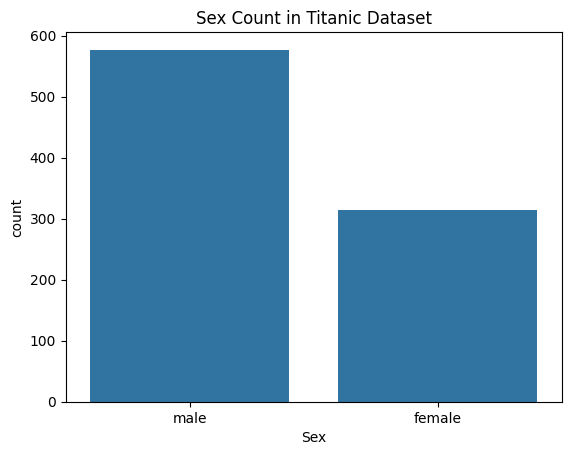

In [17]:
#Barplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', data=df)
plt.title('Sex Count in Titanic Dataset')


**왜 탑승객수가 남자가 여자의 2배일까?**

각 클래스 별 승객의 성별구조를 파악해보자.


In [26]:
# 클래스별 성별 구조 파악하기
pd.crosstab(df['Pclass'], df['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [37]:
#전체 비율
pclass_rate = pd.crosstab(df['Pclass'], df['Sex'], normalize=True)*100
pclass_rate.round(2)

Sex,female,male
Pclass,,
1,10.55,13.69
2,8.53,12.12
3,16.16,38.95


In [36]:
#클래스별 비율
pclass_pnt = pd.crosstab(df['Pclass'], df['Sex'], normalize='index') * 100
pclass_pnt.round(2)

Sex,female,male
Pclass,,
1,43.52,56.48
2,41.30,58.70
3,29.33,70.67


**탑승자의 남성비율이 두드러지게 높은 부분은 Pclass 3에 해당 (무려 70%가 남성)**\
**나머지는 약 60:40 정도의 비율이고 클래스가 높을 수록 여성의 비율이 높다**

역사적 배경

1912년 당시, 해외 이동·여행은 남성 중심\
유럽에서 미국으로 가는 이민자, 사업가, 직원들은 주로 남성\
특히 3등석에는 일자리를 찾으러 가는 젊은 남성들 위주\
3등석에 남성이 몰려서 전체 남성 비율이 상승\
선원/승무원 포함 (실제 배에 탑승한 인원 기준으로 보면 선원도 대부분 남성 추측)

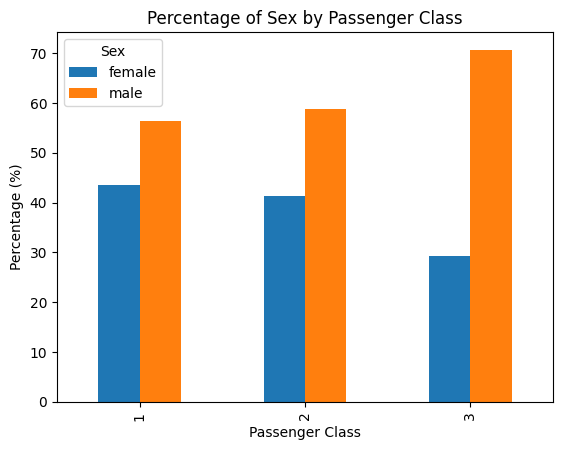

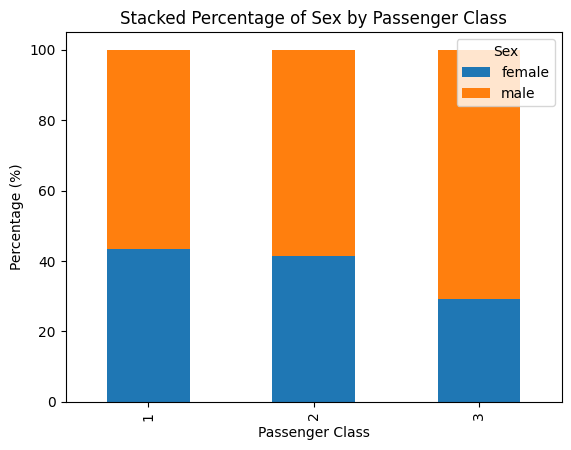

In [38]:
# 막대그래프, 스택 막대그래프

# 막대그래프 (비율별 표시)
pclass_pnt.plot(kind='bar')
plt.title('Percentage of Sex by Passenger Class')
plt.ylabel('Percentage (%)')
plt.xlabel('Passenger Class')
plt.legend(title='Sex')

# 스택 막대그래프
pclass_pnt.plot(kind='bar', stacked=True)
plt.title('Stacked Percentage of Sex by Passenger Class')
plt.ylabel('Percentage (%)')
plt.xlabel('Passenger Class')
plt.legend(title='Sex')


In [40]:
#결측치 확인

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [45]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
Age,177
Cabin,687
Embarked,2


In [48]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = pd.DataFrame({'missing_count': missing, 'missing_percent': missing_percent})
missing_summary[missing_summary['missing_count'] > 0].round(2)


,missing_count,missing_percent
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


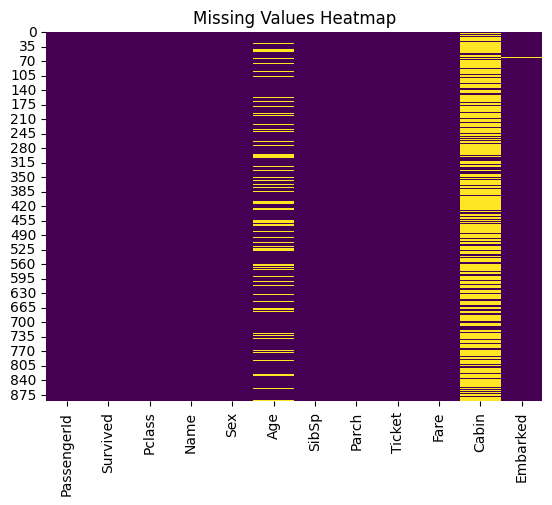

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [51]:
#필요없는 컬럼제거

df.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [52]:
df = df.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1)

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [58]:
#object을 숫자로 변환, 결측치 컬럽 확인 (Age, Embarked, Cabin)

df.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [59]:
#결측치를 가장 가능성이 높은 숫자로 변환

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-59-864adf22cc4b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-59-864adf22cc4b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [68]:
# 누가 생존율이 높은지 찾기

df.groupby(['Pclass','Sex'])['Survived'].mean().round(4)*100

Pclass  Sex   
1       female    96.81
        male      36.89
2       female    92.11
        male      15.74
3       female    50.00
        male      13.54
Name: Survived, dtype: float64

Text(0.5, 0, 'Passenger Class')

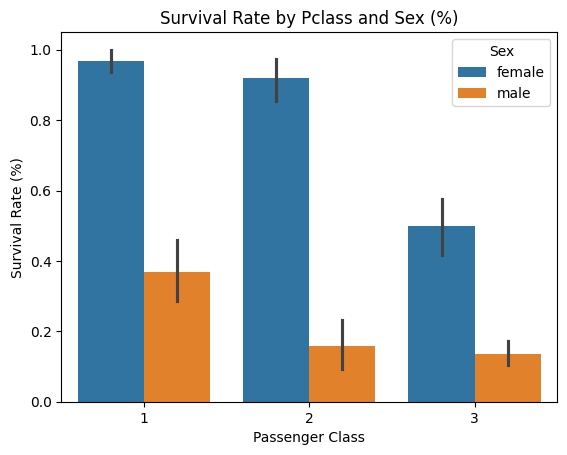

In [72]:

# Bar plot
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Pclass and Sex (%)')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger Class')

# # Point plot (선 + 점)
# sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df, dodge=True)
# plt.title('Survival Rate by Pclass and Sex (%)')
# plt.ylabel('Survival Rate (%)')
# plt.xlabel('Passenger Class')

Text(0.5, 0, 'Passenger Class')

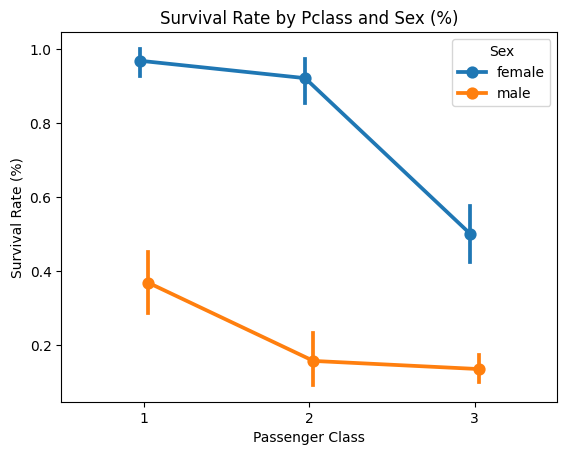

In [73]:
# Point plot (선 + 점)
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df, dodge=True)
plt.title('Survival Rate by Pclass and Sex (%)')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger Class')

<ipython-input-74-8ac6a575a12f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()


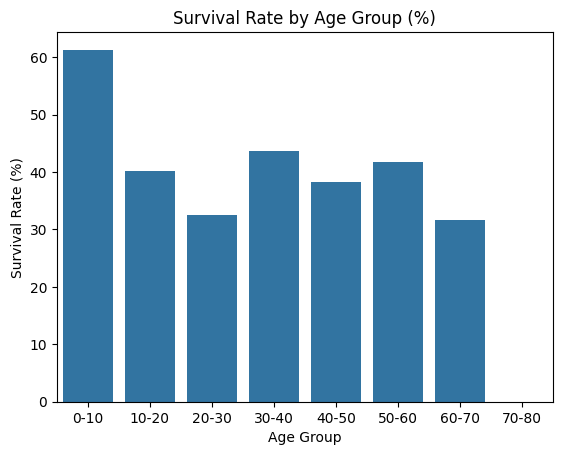

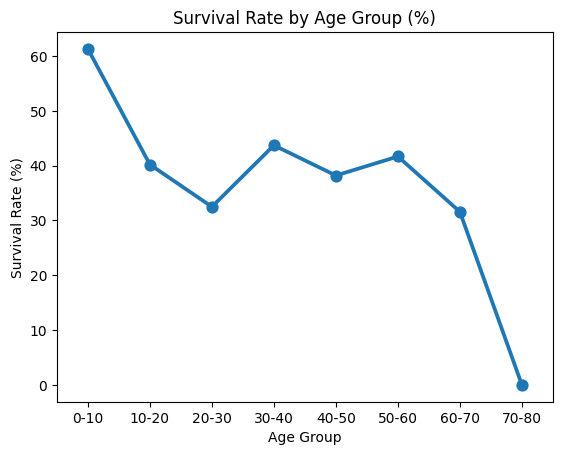

In [74]:
# 나이 구간 만들기 (예: 0-10, 10-20, ..., 70-80)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 나이대별 생존률 계산
age_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()
age_survival['Survived'] = age_survival['Survived'].round(4) * 100

# Bar plot
sns.barplot(x='AgeGroup', y='Survived', data=age_survival)
plt.title('Survival Rate by Age Group (%)')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Age Group')
plt.show()

# Point plot
sns.pointplot(x='AgeGroup', y='Survived', data=age_survival)
plt.title('Survival Rate by Age Group (%)')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Age Group')
plt.show()


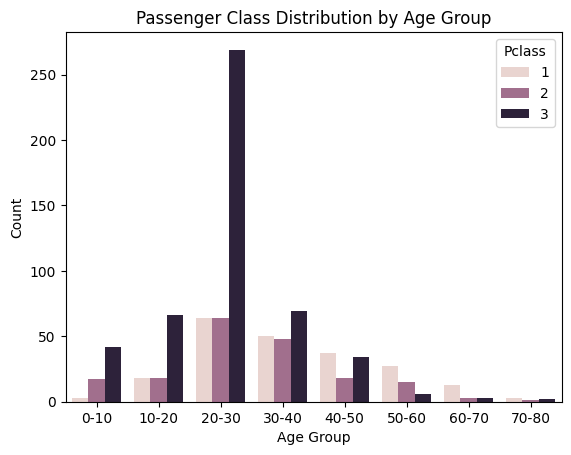

<ipython-input-75-50345d5b5be4>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pclass = df.groupby(['AgeGroup', 'Pclass']).size().reset_index(name='Count')
<ipython-input-75-50345d5b5be4>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_total = df.groupby('AgeGroup').size().reset_index(name='Total')


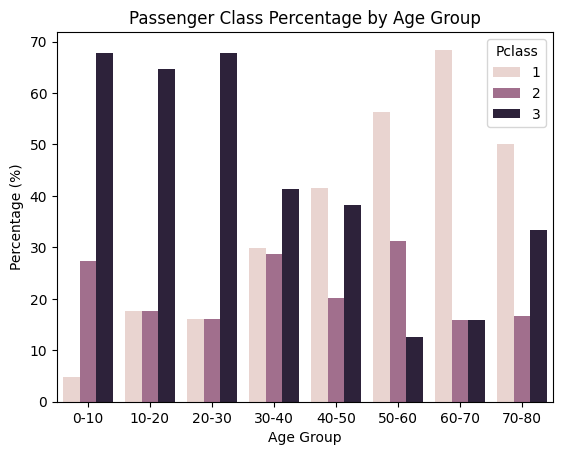

In [75]:
# 나이 구간 만들기 (예: 0-10, 10-20, ..., 70-80)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# AgeGroup별 Pclass 분포 (countplot)
sns.countplot(x='AgeGroup', hue='Pclass', data=df)
plt.title('Passenger Class Distribution by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Pclass')
plt.show()

# AgeGroup별 Pclass 비율 (normalize, percent barplot)
age_pclass = df.groupby(['AgeGroup', 'Pclass']).size().reset_index(name='Count')
age_total = df.groupby('AgeGroup').size().reset_index(name='Total')
age_pclass = age_pclass.merge(age_total, on='AgeGroup')
age_pclass['Percentage'] = (age_pclass['Count'] / age_pclass['Total']) * 100

sns.barplot(x='AgeGroup', y='Percentage', hue='Pclass', data=age_pclass)
plt.title('Passenger Class Percentage by Age Group')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.legend(title='Pclass')
plt.show()

10세 미만의 유아,어린이가 생존할 가능성이 높음